**Importing Libraries**

In [1]:
# Pandas for dataframe and data manipulation
import pandas as pd
import numpy as np

# Matplotlib for plotting/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn import preprocessing
label = preprocessing.LabelEncoder()    # for encoding text data

# For statistical analysis
from scipy import stats
from scipy.stats import ttest_ind

# For data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA    # dimensionality reduction
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# load the dataset
df_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/knn_5_imputed_dataset.xlsx")

In [3]:
pathway_pro_82 = [
    "Samples","Gender", "Age_Group", "ABCC6", "ACBD5", "AFG3L2", "AIPL1", "ALMS1", "APOD", "APOE", "ARL2BP", "ARL6", "ARMS2",
    "ARSG", "BBS10", "BBS2", "BEST1", "C2", "C3", "C8orf37", "CABP4", "CACNA1F", "CAPN5",
    "CC2D2A", "CFB", "CFD", "CFHR1", "CHM", "CLCC1", "CLN3", "CLRN1", "CLUAP1", "CNGB3",
    "CNNM4", "COX2", "CYSLT1R", "ESPN", "GRK1", "GUCY2D", "HGSNAT", "HMCN1", "IFT27", "IMPG1",
    "ITM2B", "KLHL7", "LCA5", "LRAT", "LRP5", "LTB4R", "LTE4", "LZTFL1", "MYO7A", "NDP",
    "NEK2", "NPHP1", "NR2E3", "NRL", "PCARE", "PCDH15", "PDE6B", "PDE6C", "PDZD7", "PEX7",
    "POC1B", "PRDM13", "PROM1", "PRPF4", "RB1", "RDH5", "REEP6", "RGR", "RGS9BP", "RLBP1",
    "RP1L1", "RPGR", "SAG", "SDCCAG8", "TIMP3", "TSPAN12", "TTC8", "TUBGCP4", "TUBGCP6",
    "USH2A", "VEGFA", "WDPCP"]


In [4]:
# pathways

Inflammation = ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"]

Oxidative_Stress = ["APOD", "APOE", "ARSG", "HMCN1"]

Immunity = ["C2", "C3"]

Apoptosis = ["CAPN5", "TIMP3", "RB1"]

Aging = ["APOE", "ARMS2", "PRPF4", "GRK1"]

Visual_Perception = ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"]

Ciliopathy = ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"]

Lipid_Metabolism = ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"]

Cellular_Transport = ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"]

Signal_Transduction = ["NEK2", "PRDM13", "TSPAN12"]


In [5]:
# Create a new dataset with pathway specific proteins
df_pathway = df_1[pathway_pro_82]

df_cellular_transport = df_pathway[Cellular_Transport]

# Concatenate the additional columns
df_cellular_transport = pd.concat([df_pathway[["Samples", "Gender", "Age_Group"]], df_cellular_transport], axis=1)

In [6]:
df_cellular_transport.head() # display dataset's 1st 5 rows

,Samples,Gender,Age_Group,ACBD5,AFG3L2,CHM,CLCC1,CNNM4,CYSLT1R,ESPN,...,LZTFL1,MYO7A,PDE6B,PDE6C,SDCCAG8,TUBGCP4,TUBGCP6,ITM2B,KLHL7,REEP6
0,1_50:60_F,Female,50-60,253.0,92.0,231.6,104.6,153.0,88.0,270.0,...,181.0,126.4,197.0,183.0,192.0,182.0,124.0,139.0,163.0,118.2
1,2_50:60_F,Female,50-60,239.0,76.8,247.0,107.6,138.0,111.0,270.0,...,183.2,130.6,201.0,192.0,203.0,200.0,113.0,140.0,157.0,120.0
2,3_40:50_F,Female,40-50,257.0,79.8,223.0,106.0,143.0,95.6,272.0,...,190.0,131.8,194.0,192.0,198.0,188.0,136.0,137.0,159.0,110.0
3,4_40:50_F,Female,40-50,228.0,72.0,247.0,106.8,150.0,98.0,285.0,...,190.0,114.0,195.0,205.0,183.0,188.0,119.0,129.0,175.4,111.0
4,5_50:60_F,Female,50-60,250.8,67.0,238.0,106.0,136.6,102.0,274.4,...,181.0,112.0,190.0,206.0,194.8,196.0,117.0,147.0,155.0,106.0


In [7]:
print(df_cellular_transport.shape)   # dataset rows & columns
df_cellular_transport.columns        # columns of the dataset

(500, 23)


Index(['Samples', 'Gender', 'Age_Group', 'ACBD5', 'AFG3L2', 'CHM', 'CLCC1',
       'CNNM4', 'CYSLT1R', 'ESPN', 'HGSNAT', 'LCA5', 'LRAT', 'LZTFL1', 'MYO7A',
       'PDE6B', 'PDE6C', 'SDCCAG8', 'TUBGCP4', 'TUBGCP6', 'ITM2B', 'KLHL7',
       'REEP6'],
      dtype='object')

In [8]:
df_cellular_transport.info()     # details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Samples    500 non-null    object 
 1   Gender     500 non-null    object 
 2   Age_Group  500 non-null    object 
 3   ACBD5      500 non-null    float64
 4   AFG3L2     500 non-null    float64
 5   CHM        500 non-null    float64
 6   CLCC1      500 non-null    float64
 7   CNNM4      500 non-null    float64
 8   CYSLT1R    500 non-null    float64
 9   ESPN       500 non-null    float64
 10  HGSNAT     500 non-null    float64
 11  LCA5       500 non-null    float64
 12  LRAT       500 non-null    float64
 13  LZTFL1     500 non-null    float64
 14  MYO7A      500 non-null    float64
 15  PDE6B      500 non-null    float64
 16  PDE6C      500 non-null    float64
 17  SDCCAG8    500 non-null    float64
 18  TUBGCP4    500 non-null    float64
 19  TUBGCP6    500 non-null    float64
 20  ITM2B     

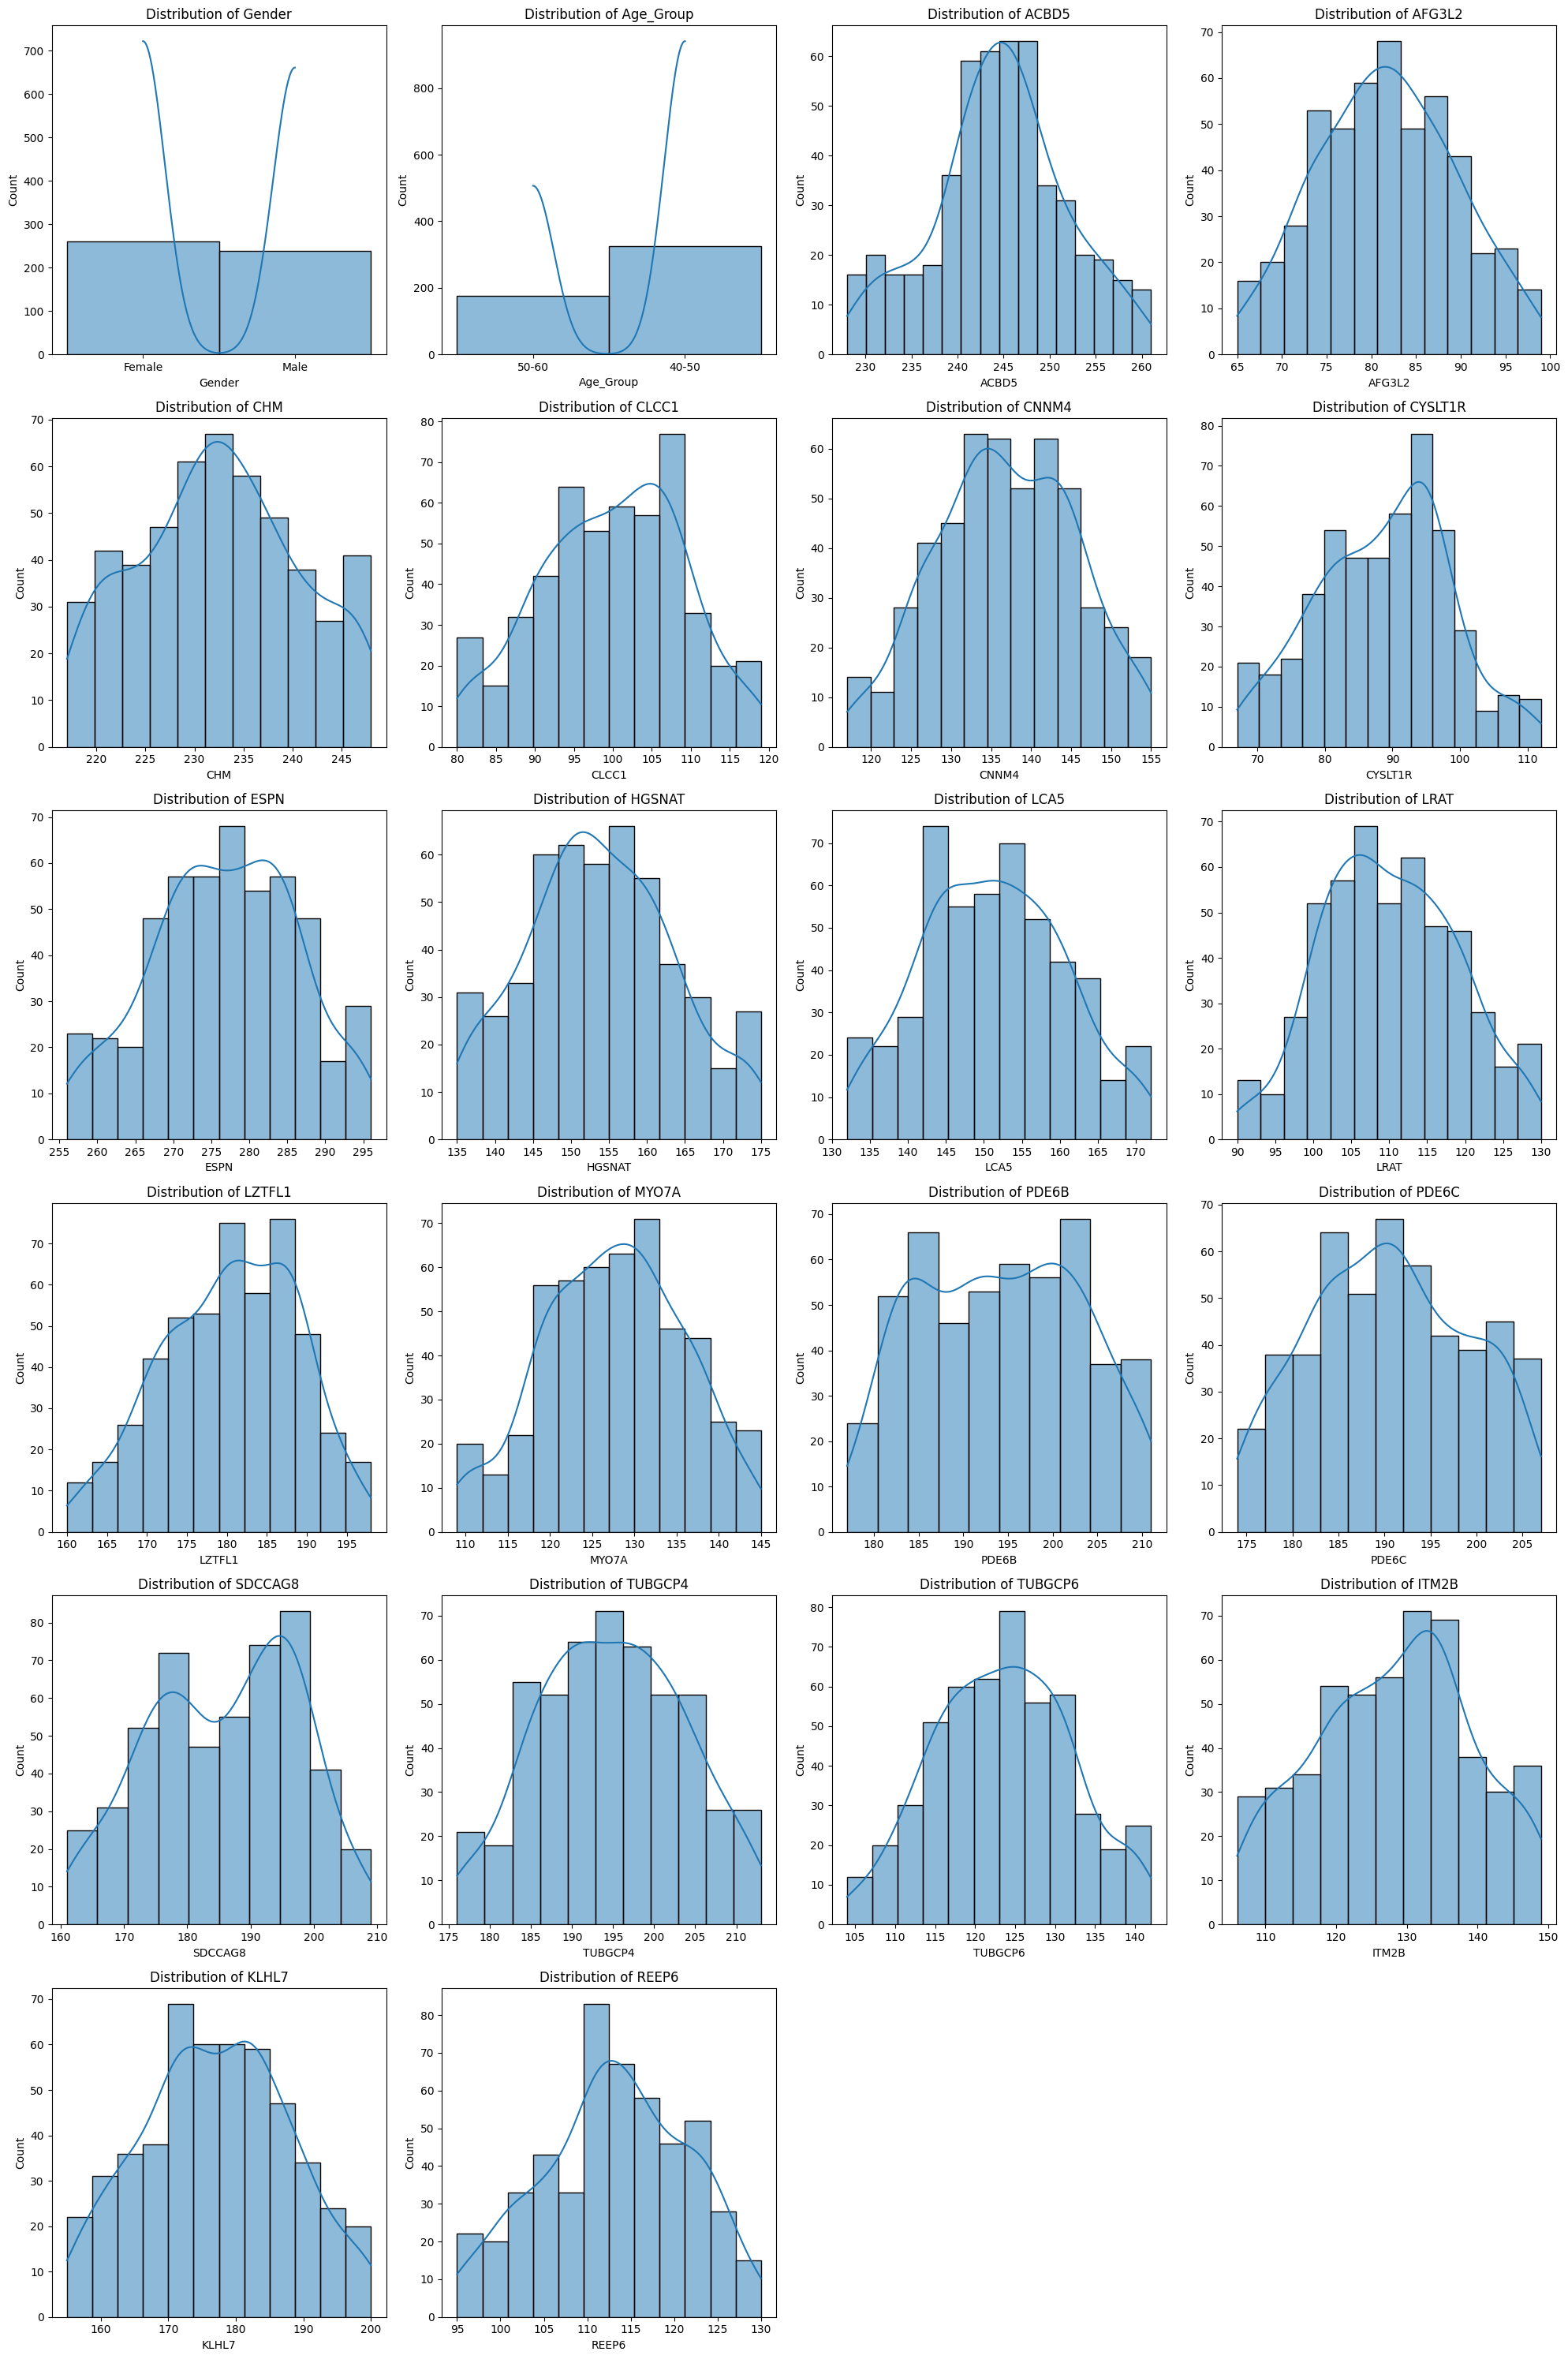

In [9]:
# Data distribution of all columns among the samples
# Number of columns to be plotted
num_columns = len(df_cellular_transport.columns) - 1  # Subtracting 1 to exclude the first column

# Calculate the number of rows and columns needed
num_cols = 4
num_rows = (num_columns // num_cols) + (num_columns % num_cols != 0)

# Visualize the distribution of each peptide
plt.figure(figsize=(20, num_rows * 5))  # Adjust height based on the number of rows
for i, column in enumerate(df_cellular_transport.columns[1:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_cellular_transport[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

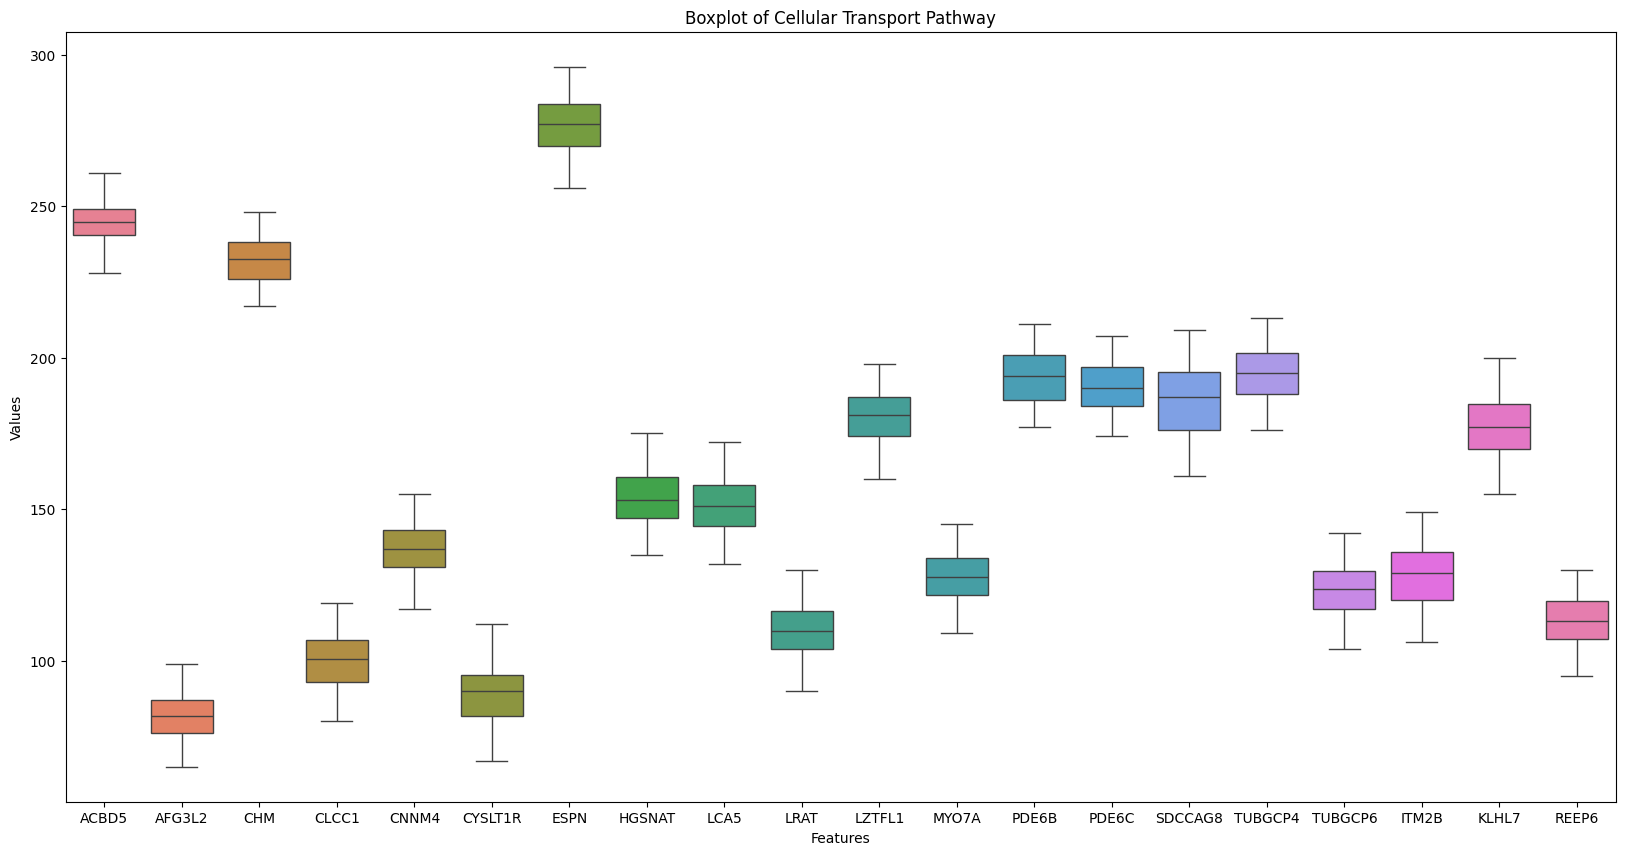

In [10]:
# Boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_cellular_transport)

plt.title("Boxplot of Cellular Transport Pathway")
plt.ylabel("Values")
plt.xlabel("Features")
plt.show()


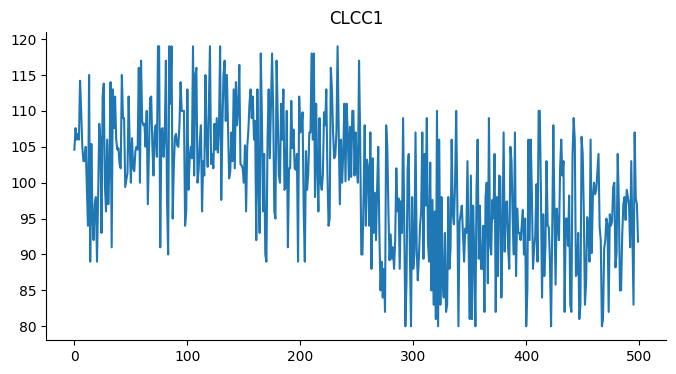

In [11]:
# CLCC1 in samples

df_cellular_transport['CLCC1'].plot(kind='line', figsize=(8, 4), title='CLCC1')
plt.gca().spines[['top', 'right']].set_visible(False)

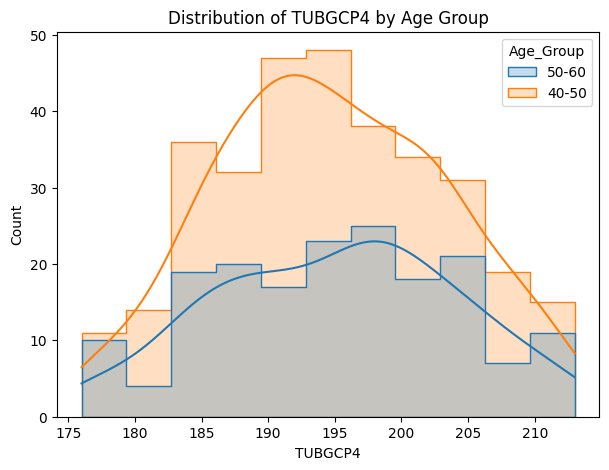

In [12]:
# Distribution plot for 'TUBGCP4'
plt.figure(figsize=(7, 5))
sns.histplot(data=df_cellular_transport, x='TUBGCP4', hue='Age_Group', kde=True, element="step")
plt.title('Distribution of TUBGCP4 by Age Group')
plt.show()

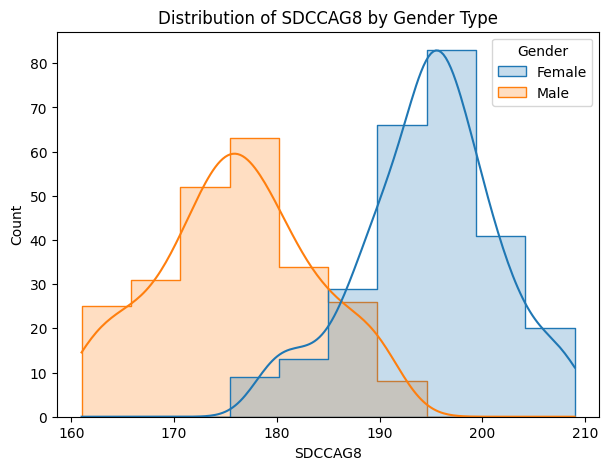

In [13]:
# Distribution plot for 'SDCCAG8'
plt.figure(figsize=(7, 5))
sns.histplot(data=df_cellular_transport, x='SDCCAG8', hue='Gender', kde=True, element="step")
plt.title('Distribution of SDCCAG8 by Gender Type')
plt.show()

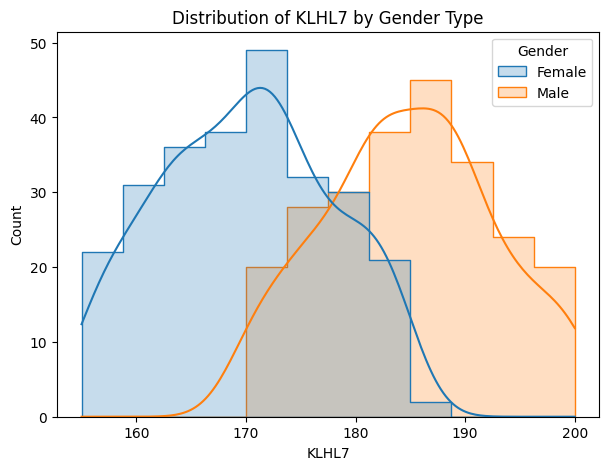

In [14]:
# Distribution plot for KLHL7
plt.figure(figsize=(7, 5))
sns.histplot(data=df_cellular_transport, x='KLHL7', hue='Gender', kde=True, element="step")
plt.title('Distribution of KLHL7 by Gender Type')
plt.show()

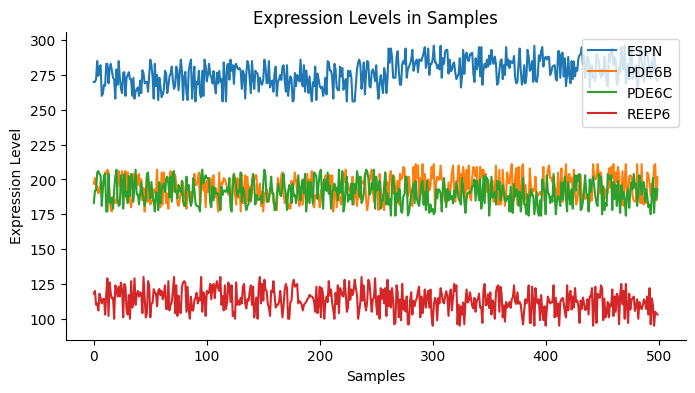

In [15]:
# Plotting proteins
df_cellular_transport[["ESPN", "PDE6B", "PDE6C", "REEP6"]].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


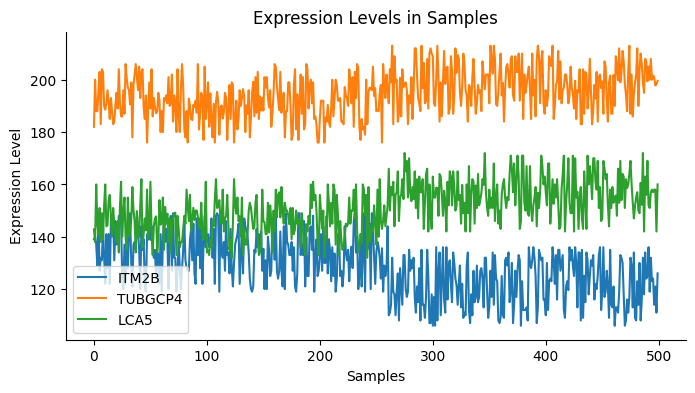

In [16]:
# Plotting proteins
df_cellular_transport[["ITM2B", "TUBGCP4", "LCA5"]].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


Here, we calculated the frequency of each protein across samples, along with their average concentration (mean) and standard deviation. Additionally, we determined the standard deviation as a percentage of the mean expression, known as the coefficient of variation (CV). This provides a relative measure of the variability in expression levels.

In [17]:
# dictionary to store results for each protein
protein_stats = {}

for protein in df_cellular_transport.columns[3:]:
    expression_data = df_cellular_transport[protein]

    # Frequency (percentage of patients expressing the protein)
    frequency = round((expression_data > 0).sum() / len(expression_data) * 100, 3)

    # Spectral Counting Mean (average concentration)
    mean_expression = round(expression_data.mean(), 3)

    # Standard Deviation and Percentage (mean expression)
    std_dev = round(expression_data.std(), 3)
    std_dev_percentage_cv = round((std_dev / mean_expression) * 100, 3) if mean_expression != 0 else np.nan

    # store the results
    protein_stats[protein] = {
        'Frequency (%)': frequency,
        'Mean Expression': mean_expression,
        'Standard Deviation': std_dev,
        'CV (%)': std_dev_percentage_cv
    }

# convert to DataFrame
protein_stats_df = pd.DataFrame(protein_stats).T

In [18]:
protein_stats_df     # columns statistical analysis

,Frequency (%),Mean Expression,Standard Deviation,CV (%)
ACBD5,100.0,244.578,7.160,2.927
AFG3L2,100.0,81.738,7.715,9.439
CHM,100.0,232.428,8.230,3.541
CLCC1,100.0,99.891,9.188,9.198
CNNM4,100.0,136.908,8.689,6.347
CYSLT1R,100.0,88.696,9.837,11.091
ESPN,100.0,276.698,9.584,3.464
HGSNAT,100.0,153.797,9.711,6.314
LCA5,100.0,151.244,9.350,6.182
LRAT,100.0,110.167,8.719,7.914


In [19]:
df_corr = df_cellular_transport.iloc[:, 3:]    # correlation among columns
df_corr.corr()

,ACBD5,AFG3L2,CHM,CLCC1,CNNM4,CYSLT1R,ESPN,HGSNAT,LCA5,LRAT,LZTFL1,MYO7A,PDE6B,PDE6C,SDCCAG8,TUBGCP4,TUBGCP6,ITM2B,KLHL7,REEP6
ACBD5,1.000000,0.069659,-0.025774,-0.030519,-0.066924,-0.017921,0.077579,0.026167,0.087577,-0.088108,-0.046848,0.026633,0.060453,-0.067270,-0.049694,-0.029053,-0.035775,-0.007930,0.071654,0.003006
AFG3L2,0.069659,1.000000,-0.095286,-0.166986,-0.198157,-0.161573,0.224605,0.216183,0.153650,-0.199451,-0.053774,0.087752,0.035593,-0.050377,-0.252402,0.065289,-0.083996,-0.119389,0.223490,-0.012029
CHM,-0.025774,-0.095286,1.000000,0.029817,0.065593,0.008680,-0.035555,-0.045457,-0.004012,-0.006258,-0.029749,-0.031237,0.034936,0.020773,0.020526,-0.066370,-0.005733,0.042895,-0.058079,-0.063665
CLCC1,-0.030519,-0.166986,0.029817,1.000000,0.320624,0.440168,-0.333119,-0.310087,-0.380229,0.395717,0.296890,-0.226437,-0.088523,0.098052,0.483861,-0.263730,0.286424,0.375283,-0.406511,0.146374
CNNM4,-0.066924,-0.198157,0.065593,0.320624,1.000000,0.355108,-0.277254,-0.288897,-0.249142,0.358129,0.256883,-0.248422,-0.179789,0.100546,0.440195,-0.216671,0.185627,0.336318,-0.332251,0.150491
CYSLT1R,-0.017921,-0.161573,0.008680,0.440168,0.355108,1.000000,-0.368855,-0.359674,-0.430333,0.398292,0.263834,-0.306364,-0.133792,0.114525,0.537087,-0.255581,0.347235,0.424161,-0.470051,0.207805
ESPN,0.077579,0.224605,-0.035555,-0.333119,-0.277254,-0.368855,1.000000,0.276496,0.242783,-0.246775,-0.190157,0.254428,0.054051,-0.112434,-0.392870,0.234847,-0.266883,-0.275013,0.368283,-0.178313
HGSNAT,0.026167,0.216183,-0.045457,-0.310087,-0.288897,-0.359674,0.276496,1.000000,0.249139,-0.376596,-0.277048,0.217894,0.153214,-0.033552,-0.445676,0.229780,-0.255301,-0.365446,0.345188,-0.176170
LCA5,0.087577,0.153650,-0.004012,-0.380229,-0.249142,-0.430333,0.242783,0.249139,1.000000,-0.420384,-0.224302,0.201080,0.142907,-0.085125,-0.456157,0.178840,-0.230768,-0.282282,0.366546,-0.183850
LRAT,-0.088108,-0.199451,-0.006258,0.395717,0.358129,0.398292,-0.246775,-0.376596,-0.420384,1.000000,0.251348,-0.272608,-0.115636,0.093506,0.519985,-0.208573,0.307738,0.331928,-0.462149,0.167014


Strong Positive Correlations: Genes like CLCC1 & SDCCAG8 (0.484) and CYSLT1R & SDCCAG8 (0.537) show strong positive relationships, indicating co-expression or functional interaction within cellular transport processes.

Strong Negative Correlations: Genes such as ARL6 & CC2D2A (-0.638) and CYSLT1R & KLHL7 (-0.470) have strong inverse relationships, suggesting antagonistic roles in cellular transport regulation.

Gene Clusters: A cluster including CYSLT1R, CNNM4, CLCC1, and SDCCAG8 shows notable correlations, hinting at potential co-regulation within the pathway.

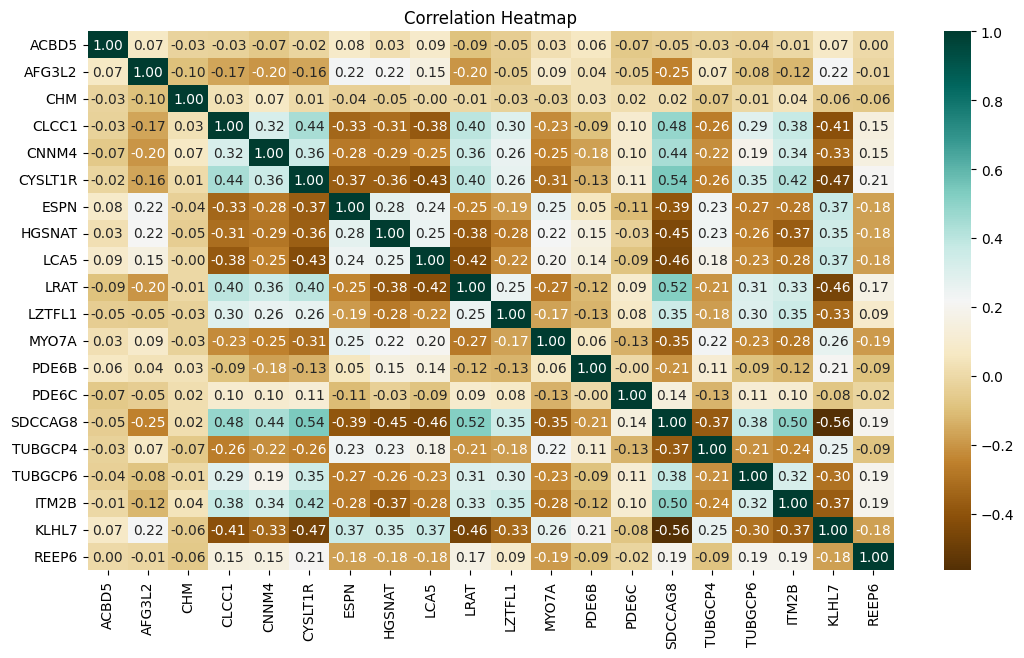

In [20]:
# Correlation Heatmap
plt.figure(figsize=(13, 7))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Performed statistical tests to identify proteins that show significant differences in expression levels between different genders (male and female) and between different age groups (40-50 and 50-60).

In [21]:
# Segregate data by gender and age group
males = df_cellular_transport[df_cellular_transport['Gender'] == 'Male']
females = df_cellular_transport[df_cellular_transport['Gender'] == 'Female']

age_40_50 = df_cellular_transport[df_cellular_transport['Age_Group'] == '40-50']
age_50_60 = df_cellular_transport[df_cellular_transport['Age_Group'] == '50-60']

# List to store significant proteins
significant_proteins_gender = []
significant_proteins_age = []

for protein in df_cellular_transport.columns[3:]:
    # Gender differences (t-test)
    t_stat, p_val_gender = ttest_ind(males[protein], females[protein], nan_policy='omit')
    if p_val_gender < 0.05:
        significant_proteins_gender.append(protein)

    # Age group differences (t-test)
    t_stat, p_val_age = ttest_ind(age_40_50[protein], age_50_60[protein], nan_policy='omit')
    if p_val_age < 0.05:
        significant_proteins_age.append(protein)

print("Proteins with significant differences between genders:", significant_proteins_gender)
print("Proteins with significant differences between age groups:", significant_proteins_age)


Proteins with significant differences between genders: ['ACBD5', 'AFG3L2', 'CLCC1', 'CNNM4', 'CYSLT1R', 'ESPN', 'HGSNAT', 'LCA5', 'LRAT', 'LZTFL1', 'MYO7A', 'PDE6B', 'PDE6C', 'SDCCAG8', 'TUBGCP4', 'TUBGCP6', 'ITM2B', 'KLHL7', 'REEP6']
Proteins with significant differences between age groups: ['CLCC1', 'ESPN', 'HGSNAT', 'KLHL7']


In [22]:
print('Number of significant proteins:', len(significant_proteins_gender))
print('Number of significant proteins:', len(significant_proteins_age))

Number of significant proteins: 19
Number of significant proteins: 4


In [23]:
# Convert Gender and Age_Group columns to categorical type
df_1['Gender'] = df_1['Gender'].astype('category')
df_1['Age_Group'] = df_1['Age_Group'].astype('category')

# pathway dictionary
pathways = {
    "Inflammation": ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"],
    "Oxidative_Stress": ["APOD", "APOE", "ARSG", "HMCN1"],
    "Immunity": ["C2", "C3"],
    "Apoptosis": ["CAPN5", "TIMP3", "RB1"],
    "Aging": ["APOE", "ARMS2", "PRPF4", "GRK1"],
    "Visual_Perception": ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"],
    "Ciliopathy": ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"],
    "Lipid_Metabolism": ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"],
    "Cellular_Transport": ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"],
    "Signal_Transduction": ["NEK2", "PRDM13", "TSPAN12"]
}

# Select the pathway to analyze
selected_pathway = "Cellular_Transport"  # Change this to analyze a different pathway

# Subset the DataFrame for the selected pathway
proteins = pathways[selected_pathway]
df_pathway_stat = df_1[proteins + ['Gender', 'Age_Group']]

# Summary statistics for the selected pathway
summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])
print(f"Summary Statistics for {selected_pathway} Pathway:")
print(summary_stats)


<ipython-input-23-f3dc9d2b2dcc>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])


Summary Statistics for Cellular_Transport Pathway:
                       ACBD5                      AFG3L2                   \
                        mean median       std       mean median       std   
Gender Age_Group                                                            
Female 40-50      243.570455  243.8  7.459639  79.072727   78.5  7.129315   
       50-60      244.522353  245.0  6.675334  80.654118   80.8  7.777341   
Male   40-50      245.531544  245.6  7.231977  84.166443   84.6  6.983471   
       50-60      245.022222  244.6  6.726065  83.953333   83.0  8.097998   

                         CHM                        CLCC1  ...   TUBGCP6  \
                        mean median       std        mean  ...       std   
Gender Age_Group                                           ...             
Female 40-50      232.845455  233.0  7.825014  105.807955  ...  7.483125   
       50-60      233.296471  233.0  8.186203  103.835294  ...  7.818611   
Male   40-50      232.275168 

In [24]:
# # Display summary statistics as a DataFrame
# summary_stats_df = pd.DataFrame(summary_stats)
# display(summary_stats_df)

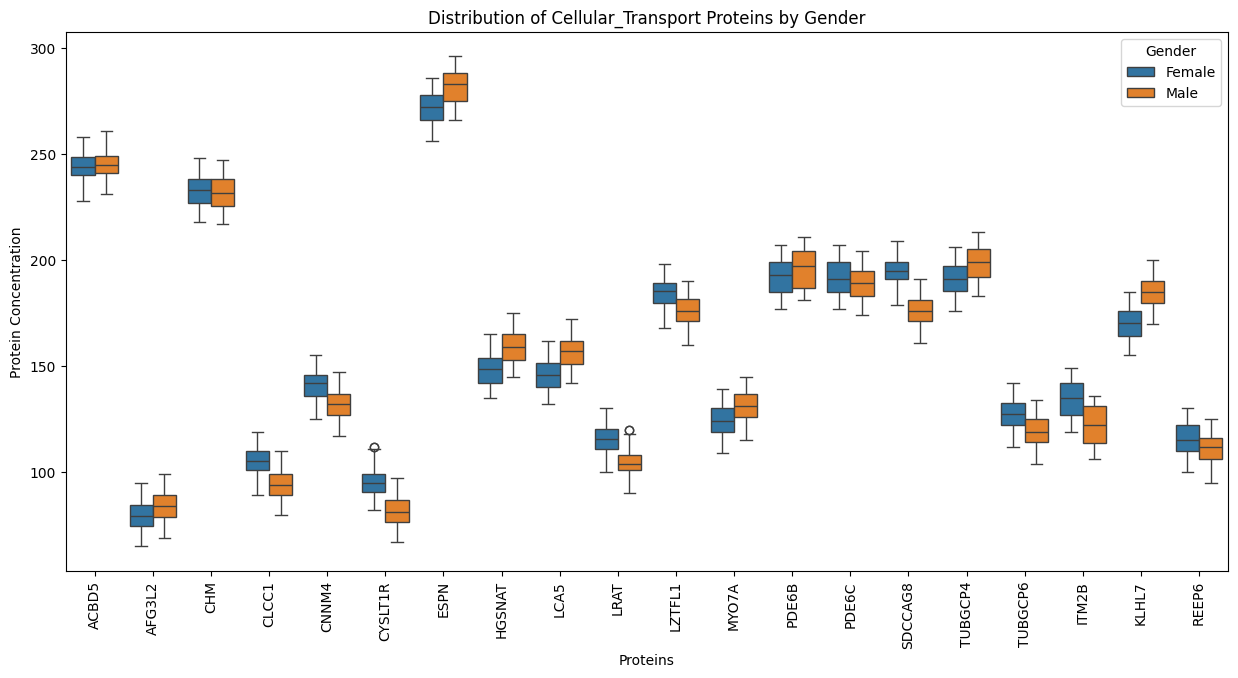

In [25]:
# Visualization: Distribution by Gender
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Gender')
plt.title(f"Distribution of {selected_pathway} Proteins by Gender")
plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

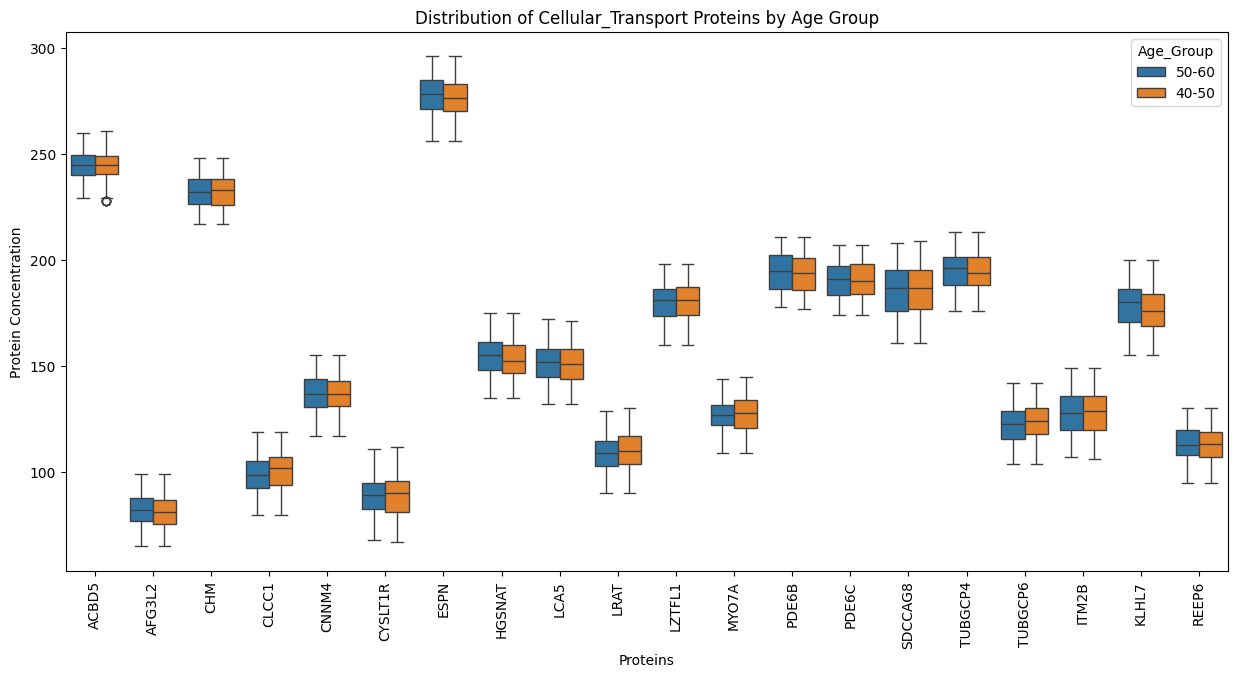

In [26]:
# Visualization: Distribution by Age Group
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Age_Group')
plt.title(f"Distribution of {selected_pathway} Proteins by Age Group")
plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

Here, we normalized the spectral counting data and categorized the proteins based on their expression levels.

In [27]:
p_columns = df_cellular_transport.columns[3:]  # protein columns

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = df_cellular_transport.copy()
df_normalized[p_columns] = scaler.fit_transform(df_cellular_transport[p_columns])

# Categorize proteins
def categorize_expression_level(value):
    if value >= 0.7:
        return 'Highly Expressed'
    elif value <= 0.3:
        return 'Lowly Expressed'
    else:
        return 'Moderately Expressed'

# Apply categorization to each protein column
df_categorized = df_normalized.copy()
for col in p_columns:
    df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

# categorization results
summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
summary = summary.transpose()

# Display the summary
print(summary)

         Highly Expressed  Lowly Expressed  Moderately Expressed
ACBD5                  85               79                   336
AFG3L2                102              111                   287
CHM                   118              126                   256
CLCC1                 109              101                   290
CNNM4                 121               93                   286
CYSLT1R                68              108                   324
ESPN                  125              100                   275
HGSNAT                 91              116                   293
LCA5                   84              125                   291
LRAT                  107               85                   308
LZTFL1                138               84                   278
MYO7A                 109               94                   297
PDE6B                 144              142                   214
PDE6C                 122              119                   259
SDCCAG8               140

In [28]:
# convert the result summary in a DataFrame
summary_df = summary.reset_index()
summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
summary_df

,Protein,Highly Expressed,Lowly Expressed,Moderately Expressed
0,ACBD5,85,79,336
1,AFG3L2,102,111,287
2,CHM,118,126,256
3,CLCC1,109,101,290
4,CNNM4,121,93,286
5,CYSLT1R,68,108,324
6,ESPN,125,100,275
7,HGSNAT,91,116,293
8,LCA5,84,125,291
9,LRAT,107,85,308


In [29]:
# Function to normalize and categorize proteins
def normalize_and_categorize(df, p_columns):
    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[p_columns] = scaler.fit_transform(df[p_columns])

    # Apply categorization to each protein column
    df_categorized = df_normalized.copy()
    for col in p_columns:
        df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

    # Summarize the categorization results
    summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
    summary = summary.transpose()

    # Convert the result summary into a DataFrame
    summary_df = summary.reset_index()
    summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
    return summary_df

# Normalize and categorize for Male
summary_male_df = normalize_and_categorize(males, p_columns)

# Normalize and categorize for Female
summary_female_df = normalize_and_categorize(females, p_columns)

# Display the results
print("Summary for Males:")
print(summary_male_df)

print("\nSummary for Females:")
print(summary_female_df)

Summary for Males:
    Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     ACBD5                39               52                   148
1    AFG3L2                54               48                   137
2       CHM                63               66                   110
3     CLCC1                49               58                   132
4     CNNM4                47               50                   142
5   CYSLT1R                49               59                   131
6      ESPN                65               62                   112
7    HGSNAT                55               67                   117
8      LCA5                59               61                   119
9      LRAT                30               49                   160
10   LZTFL1                67               43                   129
11    MYO7A                66               47                   126
12    PDE6B                77               82                    80
13    PDE6C    

In [30]:
# Normalize and categorize for Age 40-50
summary_age_40_50_df = normalize_and_categorize(age_40_50, p_columns)

# Normalize and categorize for Age 50-60
summary_age_50_60_df = normalize_and_categorize(age_50_60, p_columns)

# Display the results
print("Summary for Age 40-50:")
print(summary_age_40_50_df)

print("\nSummary for Age 50-60:")
print(summary_age_50_60_df)

Summary for Age 40-50:
    Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     ACBD5                53               58                   214
1    AFG3L2                59               77                   189
2       CHM                79               82                   164
3     CLCC1                75               65                   185
4     CNNM4                74               55                   196
5   CYSLT1R                49               78                   198
6      ESPN                74               69                   182
7    HGSNAT                56               82                   187
8      LCA5                68               75                   182
9      LRAT                75               49                   201
10   LZTFL1                94               51                   180
11    MYO7A                78               64                   183
12    PDE6B                86               95                   144
13    PDE6C

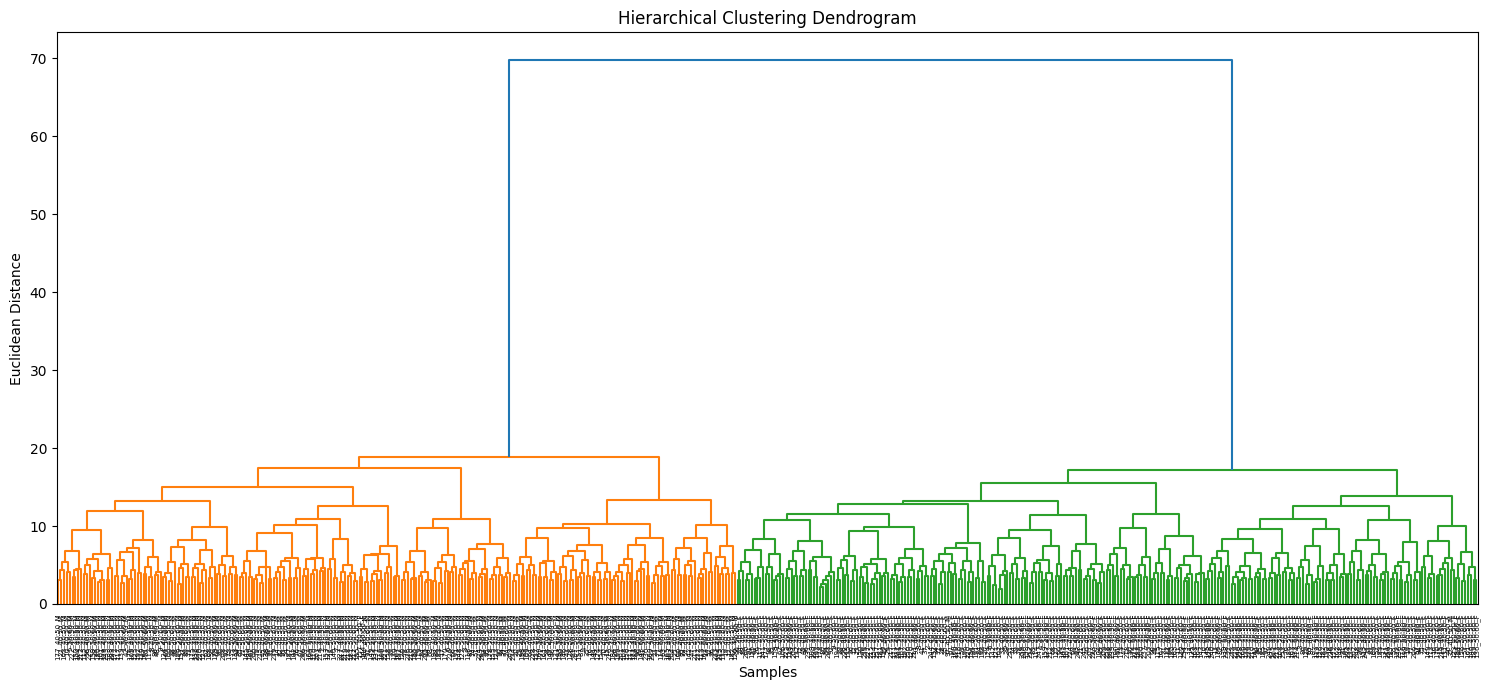

In [31]:
# Select only the protein columns for clustering
protein_columns = ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"]
df_proteins = df_cellular_transport[protein_columns]

# Standardize the data
ss_scaler = StandardScaler()
df_proteins_scaled = ss_scaler.fit_transform(df_proteins)

# Perform hierarchical clustering
linkage_matrix = linkage(df_proteins_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, labels=df_cellular_transport['Samples'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [32]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 2  # Adjust this number as needed
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Create a DataFrame to easily view the sample names with their corresponding clusters
df_clusters_d = pd.DataFrame({
    'Sample': df_cellular_transport['Samples'],
    'Cluster': cluster_labels
})

# Group the samples by their cluster
clusters = df_clusters_d.groupby('Cluster')['Sample'].apply(list).to_dict()

# Print each cluster as a list
for cluster_id, samples in clusters.items():
    print(f"Cluster {cluster_id}: {samples}\n")

Cluster 1: ['1_50:60_F', '2_50:60_F', '3_40:50_F', '4_40:50_F', '5_50:60_F', '6_50:60_F', '7_40:50_F', '8_40:50_F', '9_50:60_F', '10_40:50_F', '11_40:50_F', '12_40:50_F', '13_50:60_F', '14_40:50_F', '15_40:50_F', '16_40:50_F', '17_40:50_F', '18_40:50_F', '19_50:60_F', '20_40:50_F', '21_50:60_F', '22_40:50_F', '23_40:50_F', '24_40:50_F', '25_50:60_F', '26_40:50_F', '27_40:50_F', '28_40:50_F', '29_50:60_F', '30_40:50_F', '31_40:50_F', '32_40:50_F', '33_50:60_F', '34_40:50_F', '35_40:50_F', '36_50:60_F', '37_40:50_F', '38_40:50_F', '39_50:60_F', '40_40:50_F', '41_40:50_F', '42_40:50_F', '43_40:50_F', '44_50:60_F', '45_40:50_F', '46_40:50_F', '47_40:50_F', '48_50:60_F', '49_40:50_F', '50_40:50_F', '51_40:50_F', '52_40:50_F', '53_50:60_F', '54_40:50_F', '55_40:50_F', '56_50:60_F', '57_40:50_F', '58_40:50_F', '59_40:50_F', '60_40:50_F', '61_40:50_F', '62_40:50_F', '63_40:50_F', '64_40:50_F', '65_40:50_F', '66_40:50_F', '67_40:50_F', '68_40:50_F', '69_50:60_F', '70_40:50_F', '71_50:60_F', '72

In [33]:
cluster_counts = df_clusters_d['Cluster'].value_counts()
cluster_counts

,count
Cluster,
1,261
2,239


Performed clustering to identify natural groupings or patterns in our data. We used K-means algorithm and Elbow method to determine the optimal number of clusters by plotting the Within-Cluster Sum of Square (WCSS) against different numbers of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

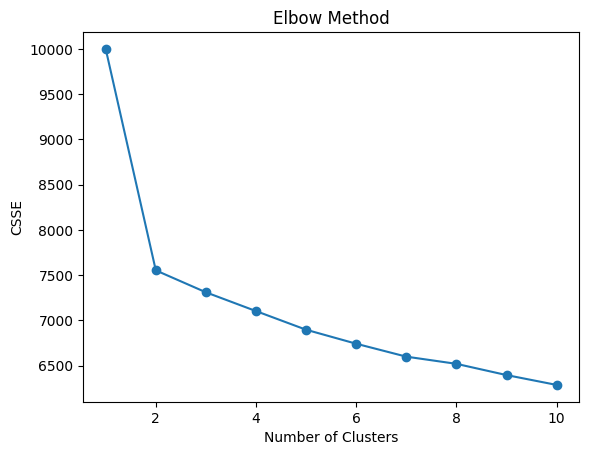

In [34]:
pro_columns = df_cellular_transport.columns[3:]

# Data Standardization/Normalization
s_scaler = StandardScaler()
# m_scaler = MinMaxScaler()
X = s_scaler.fit_transform(df_cellular_transport[pro_columns])

k_rang = range(1, 11)
csse = []

for k in k_rang:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    csse.append(kmeans.inertia_)    # sum of square error

# Plotting the Elbow Curve
plt.plot(k_rang, csse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CSSE')
plt.show()

In [35]:
csse

[10000.000000000005,
 7552.267210297556,
 7309.848095371236,
 7102.245421820505,
 6896.087016239175,
 6741.3738974873595,
 6598.5008182177435,
 6519.107470941857,
 6394.923363844115,
 6286.046202334415]

In [36]:
# K-means Clustering (optimal k based on the Elbow plot)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X)
print(clusters)

# Add cluster labels to the DataFrame
df_cluster = df_cellular_transport.copy()
df_cluster['Cluster'] = clusters

# print the DataFrame
df_cluster

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Samples,Gender,Age_Group,ACBD5,AFG3L2,CHM,CLCC1,CNNM4,CYSLT1R,ESPN,...,MYO7A,PDE6B,PDE6C,SDCCAG8,TUBGCP4,TUBGCP6,ITM2B,KLHL7,REEP6,Cluster
0,1_50:60_F,Female,50-60,253.0,92.0,231.6,104.6,153.0,88.0,270.0,...,126.4,197.0,183.0,192.0,182.0,124.0,139.0,163.0,118.2,1
1,2_50:60_F,Female,50-60,239.0,76.8,247.0,107.6,138.0,111.0,270.0,...,130.6,201.0,192.0,203.0,200.0,113.0,140.0,157.0,120.0,1
2,3_40:50_F,Female,40-50,257.0,79.8,223.0,106.0,143.0,95.6,272.0,...,131.8,194.0,192.0,198.0,188.0,136.0,137.0,159.0,110.0,1
3,4_40:50_F,Female,40-50,228.0,72.0,247.0,106.8,150.0,98.0,285.0,...,114.0,195.0,205.0,183.0,188.0,119.0,129.0,175.4,111.0,1
4,5_50:60_F,Female,50-60,250.8,67.0,238.0,106.0,136.6,102.0,274.4,...,112.0,190.0,206.0,194.8,196.0,117.0,147.0,155.0,106.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,235_50:60_M,Male,50-60,241.0,78.6,231.4,83.0,132.8,80.0,277.0,...,131.4,193.0,201.0,191.0,201.6,118.0,124.0,180.0,109.8,0
496,236_40:50_M,Male,40-50,247.4,72.0,247.0,107.0,130.0,70.0,295.0,...,140.0,210.0,176.0,175.8,201.0,112.0,114.0,183.0,95.0,0
497,237_50:60_M,Male,50-60,260.0,87.6,232.0,97.8,122.2,85.0,279.2,...,130.0,211.0,193.4,170.0,197.8,131.0,121.0,198.0,105.0,0
498,238_40:50_M,Male,40-50,240.0,80.0,238.0,97.0,123.0,70.0,272.0,...,126.0,185.0,186.2,189.0,198.4,104.0,111.0,187.0,104.0,0


In [37]:
# Group the DataFrame by the 'Cluster' column
clustered_samples = df_cluster.groupby('Cluster')['Samples'].apply(list)

# Print the sample names for each cluster
for cluster, samples in clustered_samples.items():
    print(f"Cluster {cluster}:")
    print(samples)
    print("\n")


Cluster 0:
['1_50:60_M', '2_40:50_M', '3_40:50_M', '4_40:50_M', '5_50:60_M', '6_40:50_M', '7_50:60_M', '8_40:50_M', '9_50:60_M', '10_40:50_M', '11_40:50_M', '12_40:50_M', '13_50:60_M', '14_40:50_M', '15_50:60_M', '16_40:50_M', '17_40:50_M', '18_50:60_M', '19_40:50_M', '20_40:50_M', '21_50:60_M', '22_40:50_M', '23_40:50_M', '24_50:60_M', '25_40:50_M', '26_40:50_M', '27_50:60_M', '28_40:50_M', '29_40:50_M', '30_50:60_M', '31_40:50_M', '32_40:50_M', '33_50:60_M', '34_40:50_M', '35_50:60_M', '36_40:50_M', '37_40:50_M', '38_50:60_M', '39_40:50_M', '40_40:50_M', '41_50:60_M', '42_40:50_M', '43_50:60_M', '44_40:50_M', '45_40:50_M', '46_50:60_M', '47_50:60_M', '48_40:50_M', '49_50:60_M', '50_40:50_M', '51_40:50_M', '52_50:60_M', '53_40:50_M', '54_40:50_M', '55_50:60_M', '56_40:50_M', '57_40:50_M', '58_50:60_M', '59_40:50_M', '60_40:50_M', '61_50:60_M', '62_40:50_M', '63_50:60_M', '64_40:50_M', '65_50:60_M', '66_40:50_M', '67_50:60_M', '68_40:50_M', '69_50:60_M', '70_40:50_M', '71_40:50_M', '72

In [38]:
# kmeans.cluster_centers_

df_cluster.value_counts('Cluster')

,count
Cluster,
1,262
0,238


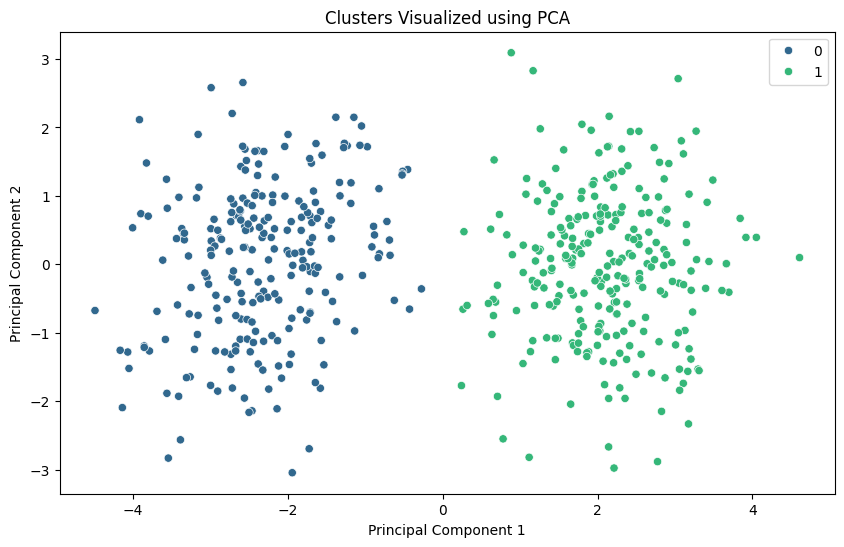

In [39]:
# Visualize the Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

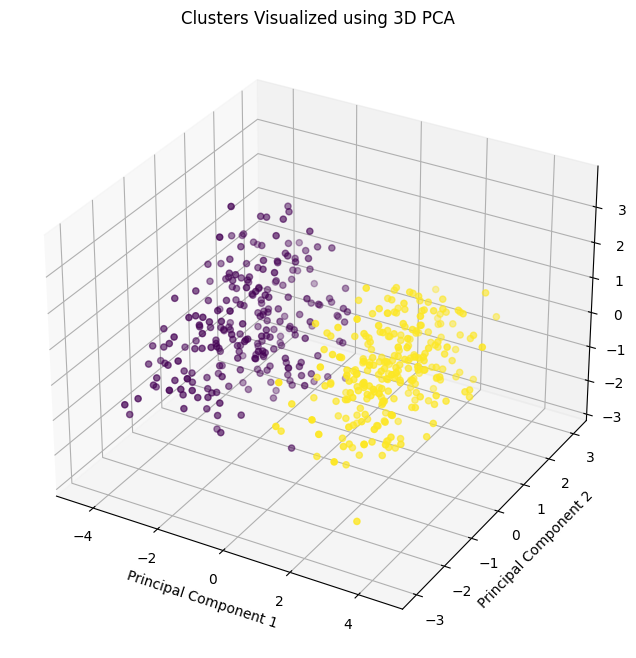

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('Clusters Visualized using 3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
